In [1]:
import pandas as pd
from pandas import HDFStore,DataFrame
import numpy as np
import csv
import plotly.plotly as py
import plotly.tools as tls 
from plotly.graph_objs import *
import cufflinks

%matplotlib inline

py.sign_in('sasha.stoikov', 'tgjlyepa0n')

ticker='AXP' #bad 0.0176
ticker='BA' #bad 0.0256

ticker='CAT' #bad 0.0348
ticker='DD'  #ok 0.017
ticker='DIS' #ok 0.0145

ticker='HD' #ok 0.0154

ticker='IBM' #ok 0.0626
ticker='INTC' #bad 0.0121
ticker='JNJ' #ok 0.0150

ticker='KO' #ok 0.0149
ticker='MCD' #ok 0.0195
#abc ticker='MMM' #bad 0.0271
#ticker='MRK' #ok 0.0141
ticker='MSFT' #bad 0.0121

spread=0.01
#ticker='JPM' #good 0.0141
#ticker='KFT' #good 0.0135
#ticker='GE' #good 0.0128
#ticker='HPQ' #good 0.0135
#ticker='BAC' #good 0.0118
#ticker='AA' #good 0.0126

#ticker='8604.T'
#ticker='ES'
#ticker='ES_flashcrash'
#spread=0.25

Charle's data

In [27]:
#charles=pd.read_hdf('data/microsoft_2014_jan_02.h5','df')
hdf = HDFStore('data/microsoft_2014_jan_02.h5')
print hdf.df_trades.head()

        bid    ask                    ts_recv  price   qty  bid_size  \
1643  37.27  37.28 2014-01-02 16:22:06.341000  37.27  1000      2081   
1644  37.27  37.28 2014-01-02 16:22:06.342000  37.27   200      1081   
1645  37.27  37.28 2014-01-02 16:22:06.342000  37.27   350       881   
1646  37.27  37.28 2014-01-02 16:22:06.342000  37.27   100       531   
1647  37.27  37.28 2014-01-02 16:22:06.342000  37.27   100       431   

      ask_size  status qualifier  source  
1643      5788     800    Normal  NASDAQ  
1644      5788     800    Normal  NASDAQ  
1645      5788     800    Normal  NASDAQ  
1646      5788     800    Normal  NASDAQ  
1647      5788     800    Normal  NASDAQ  


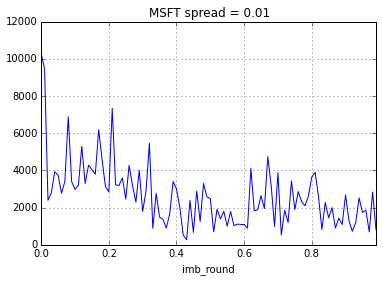

In [28]:
spread=0.01
df=hdf.df_trades
df['bid']=np.round(df['bid'],2)
df['ask']=np.round(df['ask'],2)
df['price']=np.round(df['price'],2)
df['spread']=np.round(df['ask']-df['bid'],2)
df['imb']=df['bid_size']/(df['bid_size']+df['ask_size'])
df['side']=np.array(df['price']>=df['ask']).astype(int)-np.array(df['price']<=df['bid']).astype(int)
df['spread'].mean()
df['imb_round']=np.round(df['imb'],2)
volume_group=df[df['spread']==spread].groupby(['imb_round'])
volume_group['qty'].sum().plot(title=ticker+' spread = 0.01')


Only run this once! it takes a while

In [61]:
# clean the data
reader = csv.reader(open("data/%s.csv"%str(ticker), "rb"), delimiter='\t')

f = csv.writer(open("data/%s_clean.csv"%str(ticker), "wb"))
i=0
for line in reader:
    try: 
        y=int(line[0][0])
        #print map(float,line[0].split(','))[0]
        f.writerow(line[0].split(','))
    except:
        i=i+1
        
    i=i+1
    if i%500000==0:
        print i

500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000


Load Abergel data

In [2]:
df=pd.read_csv("data/%s_clean.csv"%str(ticker))
#df=pd.read_csv("data/%s.csv"%str(ticker))
len(df)

15952330

In [3]:
df.columns=['date','time','bid','bs','ask','as','price','size']
df['bid']=np.round(df['bid'],2)
df['ask']=np.round(df['ask'],2)
df['price']=np.round(df['price'],2)
df['spread']=np.round(df['ask']-df['bid'],2)
df['imb']=df['bs']/(df['bs']+df['as'])
df['side']=np.array(df['price']==df['ask']).astype(int)-np.array(df['price']==df['bid']).astype(int)+np.array(df['price']>df['ask']).astype(int)*2-np.array(df['price']<df['bid']).astype(int)*2
df=df[df['bid']>0] #remove negative bids
df=df[np.abs(df['side'])<2] #remove trades outside the bid/ask spread
df['spread'].mean()


0.012107733506195994

In [5]:
df.head(20)

,date,time,bid,bs,ask,as,price,size,spread,imb,side
0,40605,34200.473,26.25,191,26.26,7,26.26,150,0.01,0.964646,1
1,40605,34200.508,26.25,191,26.26,6,26.26,100,0.01,0.969543,1
2,40605,34200.508,26.25,195,26.26,1,26.26,600,0.01,0.994898,1
3,40605,34200.508,26.25,195,26.26,1,26.26,100,0.01,0.994898,1
4,40605,34200.517,26.25,195,26.26,5,26.26,100,0.01,0.975000,1
5,40605,34200.517,26.25,197,26.27,10,26.26,400,0.02,0.951691,0
6,40605,34200.697,26.25,191,26.26,4,26.26,100,0.01,0.979487,1
7,40605,34200.788,26.25,191,26.27,17,26.26,400,0.02,0.918269,0
8,40605,34200.820,26.26,5,26.27,13,26.27,300,0.01,0.277778,1
9,40605,34200.830,26.26,7,26.27,6,26.27,400,0.01,0.538462,1


In [19]:
df['imb_round']=np.round(df['imb'],2)
df[df['imb_round']==0.5].head(20)

,date,time,bid,bs,ask,as,price,size,spread,imb,side,imb_round
2012,40605,34681.221,26.33,52,26.34,53,26.33,100,0.01,0.495238,-1,0.5
2322,40605,34791.607,26.35,111,26.36,109,26.35,100,0.01,0.504545,-1,0.5
2323,40605,34791.607,26.35,111,26.36,109,26.35,100,0.01,0.504545,-1,0.5
2327,40605,34791.607,26.35,111,26.36,109,26.35,100,0.01,0.504545,-1,0.5
2351,40605,34794.111,26.35,103,26.36,103,26.35,100,0.01,0.500000,-1,0.5
2352,40605,34794.111,26.35,103,26.36,103,26.35,100,0.01,0.500000,-1,0.5
3490,40605,35087.405,26.35,115,26.36,116,26.36,100,0.01,0.497835,1,0.5
4133,40605,35416.173,26.37,155,26.38,157,26.37,100,0.01,0.496795,-1,0.5
4134,40605,35416.173,26.37,155,26.38,157,26.37,100,0.01,0.496795,-1,0.5
4137,40605,35416.173,26.37,155,26.38,157,26.37,100,0.01,0.496795,-1,0.5


In [14]:
#df=df[df['size']<=100]

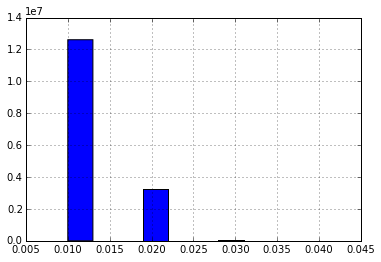

In [8]:
df[(df['spread']>0) & (df['spread']<0.05)]['spread'].hist()

In [15]:
spread_group=df[df['spread']>0].groupby(['spread','side'])
spread_group['size'].count()

spread  side
0.01    -1      2624018
         1      2606173
0.02    -1        21244
         0      1359080
         1        20573
0.03    -1         1685
         0         8224
         1         1526
0.04    -1          607
         0         2571
         1          463
0.05    -1          349
         0         1229
         1          214
0.06    -1           77
         0          654
         1          108
0.07    -1           42
         0          270
         1           38
0.08    -1            8
         0          150
         1           24
0.09    -1            7
         0           92
         1            9
0.10    -1           12
         0           43
         1            3
0.11    -1            2
         0           48
         1            1
0.12    -1            4
         0           17
         1            1
0.13     0            6
0.17     0            1
Name: size, dtype: int64

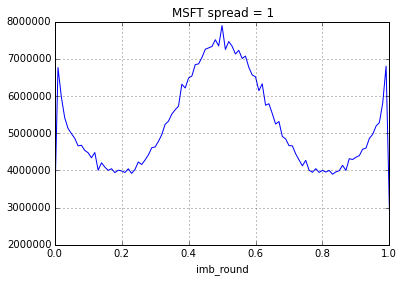

In [16]:
volume_group=df[df['spread']==spread].groupby(['imb_round'])
volume_group['size'].sum().plot(title=ticker+' spread = 1')

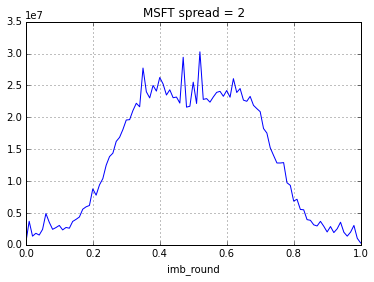

In [11]:
volume_group=df[df['spread']==2*spread].groupby(['imb_round'])
volume_group['size'].sum().plot(title=ticker+' spread = 2')